<a href="https://colab.research.google.com/github/jeetu-g2-1/My_Projects/blob/main/VisuliazationOfPerceptronlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00


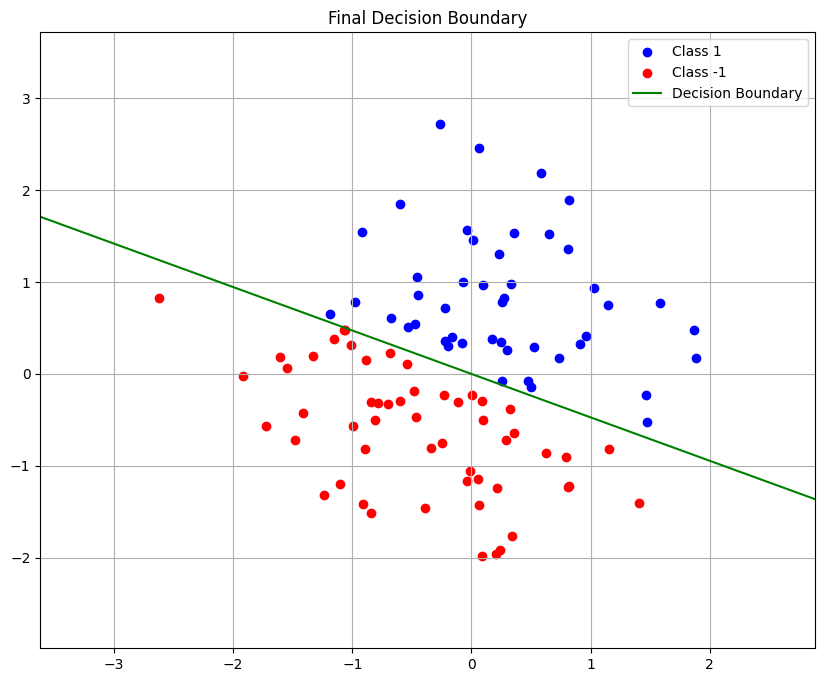

Training completed in 7 iterations
Final weights: [0.006044   0.01278244]
Final bias: 0.0


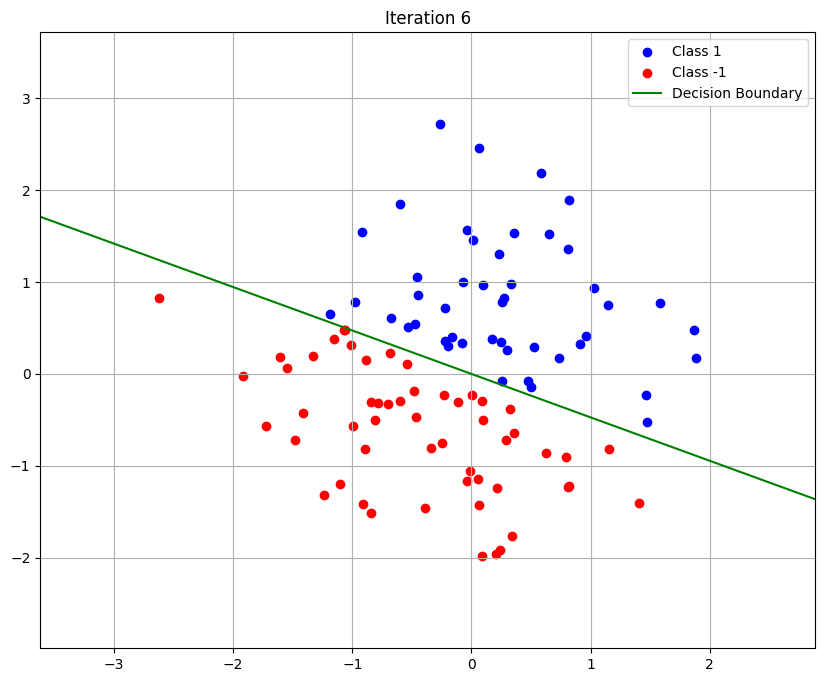

In [ ]:
# First, install required package for animation display in Colab
!pip install ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import pandas as pd
import ipywidgets as widgets
from matplotlib import rc
rc('animation', html='jshtml')

class PerceptronVisualizer:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = []

    def generate_data(self, n_samples=100, noise=0.1):
        """Generate a linearly separable dataset"""
        # Generate random points
        np.random.seed(42)
        X = np.random.randn(n_samples, 2)

        # Create a random line for separation
        random_line = np.random.randn(2)
        y = np.sign(np.dot(X, random_line) + np.random.randn(n_samples) * noise)

        return X, y

    def _update_weights(self, x, y):
        """Update weights and bias for a single training example"""
        prediction = np.sign(np.dot(x, self.weights) + self.bias)
        if prediction != y:
            self.weights += self.learning_rate * y * x
            self.bias += self.learning_rate * y
            return True
        return False

    def fit(self, X, y):
        """Train the perceptron and store weight history"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.history = [(np.copy(self.weights), self.bias)]

        for _ in range(self.n_iterations):
            updates_made = False
            for idx in range(n_samples):
                if self._update_weights(X[idx], y[idx]):
                    updates_made = True
                    self.history.append((np.copy(self.weights), self.bias))

            if not updates_made:
                break

    def plot_decision_boundary(self, X, y, weight=None, bias=None, ax=None):
        """Plot the decision boundary and data points"""
        if ax is None:
            ax = plt.gca()

        if weight is None:
            weight = self.weights
        if bias is None:
            bias = self.bias

        # Plot data points
        ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
        ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        if weight[1] != 0:
            slope = -weight[0] / weight[1]
            intercept = -bias / weight[1]
            x = np.array([x_min, x_max])
            y = slope * x + intercept
            ax.plot(x, y, '-g', label='Decision Boundary')

        ax.set_xlim([x_min, x_max])
        ax.set_ylim([X[:, 1].min() - 1, X[:, 1].max() + 1])
        ax.legend()
        ax.grid(True)

    def create_animation(self, X, y):
        """Create an animation of the learning process"""
        fig, ax = plt.subplots(figsize=(10, 8))

        def update(frame):
            ax.clear()
            weights, bias = self.history[frame]
            self.plot_decision_boundary(X, y, weights, bias, ax)
            ax.set_title(f'Iteration {frame}')

        anim = FuncAnimation(
            fig, update, frames=len(self.history),
            interval=200, repeat=False
        )

        return anim.to_jshtml()  # Convert animation to HTML for Colab display

# Example usage and demonstration
def main():
    # Create visualizer instance
    visualizer = PerceptronVisualizer(learning_rate=0.01, n_iterations=100)

    # Generate synthetic dataset
    X, y = visualizer.generate_data(n_samples=100)

    # Train the perceptron
    visualizer.fit(X, y)

    # Create final plot
    plt.figure(figsize=(10, 8))
    visualizer.plot_decision_boundary(X, y)
    plt.title('Final Decision Boundary')
    plt.show()

    # Create and display animation
    anim_html = visualizer.create_animation(X, y)
    display(HTML(anim_html))

    # Print training statistics
    print(f"Training completed in {len(visualizer.history)} iterations")
    print(f"Final weights: {visualizer.weights}")
    print(f"Final bias: {visualizer.bias}")

# Run the demonstration
main()